In [1]:
import math
import time
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style
import paste as pst
import ot

In [2]:
sample_names = ["HCC-5A","HCC-5B","HCC-5C","HCC-5D"]
experiment_name = 'LICA'
input_dir = 'G:/dataset/LICA/input/'
output_dir = 'G:/dataset/LICA/output/PASTE/'

# Load Slices

In [3]:
data_dir = input_dir    # change this path to the data you wish to analyze

# Assume that the coordinates of slices are named slice_name + "_coor.csv"
def load_slices(data_dir, slice_names = sample_names):
    slices = []  
    for slice_name in slice_names:
        print(slice_name)
        ### get anndata
        slice_i = sc.read_visium(input_dir + slice_name)
        slice_i.var_names_make_unique()
        # load by meta + coor
        # slice_i = sc.read_csv(data_dir + slice_name + ".csv")
        # slice_i_coor = np.genfromtxt(data_dir + slice_name + "_coor.csv", delimiter = ',')
        # slice_i.obsm['spatial'] = slice_i_coor
        
        ### Preprocess slices
        sc.pp.filter_genes(slice_i, min_counts = 15)
        sc.pp.filter_cells(slice_i, min_counts = 100)
        slices.append(slice_i)
    return slices

slices = load_slices(data_dir)
slice1, slice2, slice3, slice4 = slices

HCC-5A


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5B


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5C


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5D


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
print(slice1)
print(slice2)
print(slice3)
print(slice4)

AnnData object with n_obs × n_vars = 3457 × 14799
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3954 × 14969
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3775 × 15070
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 4348 × 15114
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'


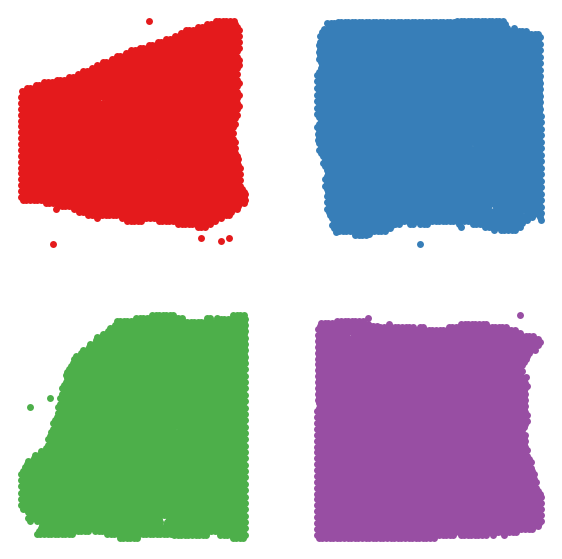

In [5]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
pst.plot_slice(slice1,slice_colors[0],ax=axs[0,0])
pst.plot_slice(slice2,slice_colors[1],ax=axs[0,1])
pst.plot_slice(slice3,slice_colors[2],ax=axs[1,0])
pst.plot_slice(slice4,slice_colors[3],ax=axs[1,1])
plt.show()

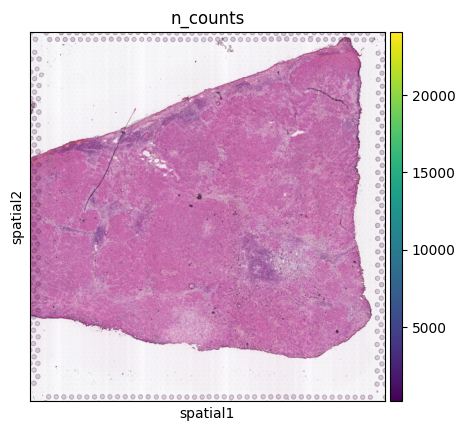

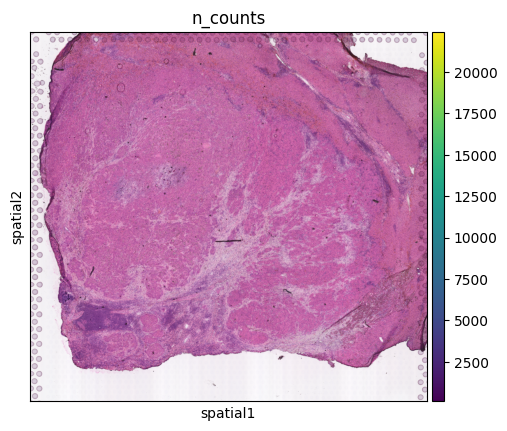

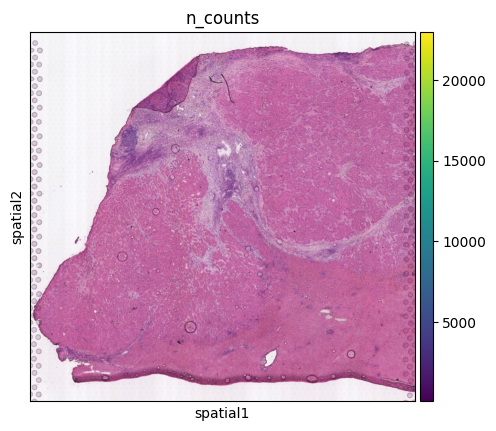

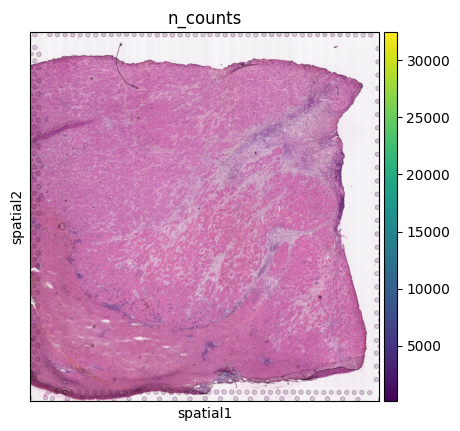

In [6]:
sc.pl.spatial(slice1, color = "n_counts", spot_size = 1)
sc.pl.spatial(slice2, color = "n_counts", spot_size = 1)
sc.pl.spatial(slice3, color = "n_counts", spot_size = 1)
sc.pl.spatial(slice4, color = "n_counts", spot_size = 1)

# run PASTE

In [7]:
# Pairwise align the slices
# pi12 = pst.pairwise_align(slice1, slice2)
# pi12 = pst.pairwise_align(slice1, slice2, backend = ot.backend.TorchBackend(), use_gpu = True)
start = time.time()

pi12 = pst.pairwise_align(slice1, slice2, backend = ot.backend.TorchBackend(), use_gpu = True)
pi23 = pst.pairwise_align(slice2, slice3, backend = ot.backend.TorchBackend(), use_gpu = True)
pi34 = pst.pairwise_align(slice3, slice4, backend = ot.backend.TorchBackend(), use_gpu = True)

print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


gpu is available, using gpu.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


gpu is available, using gpu.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Runtime: 136.01631259918213


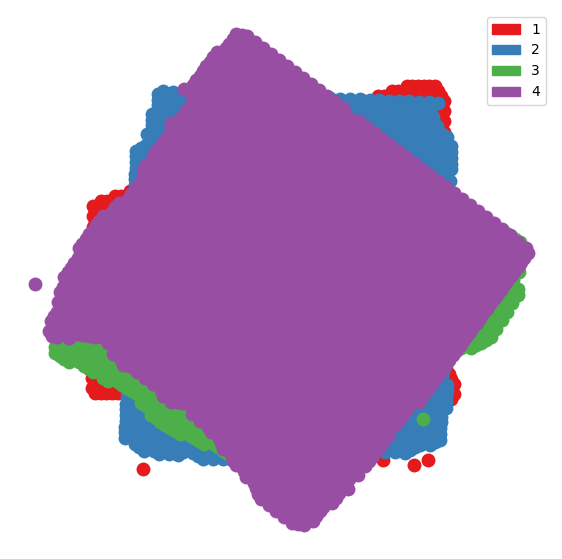

In [8]:
pis = [pi12, pi23, pi34]
slices = [slice1, slice2, slice3, slice4]

new_slices = pst.stack_slices_pairwise(slices, pis)

slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2'),mpatches.Patch(color=slice_colors[2], label='3'),mpatches.Patch(color=slice_colors[3], label='4')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

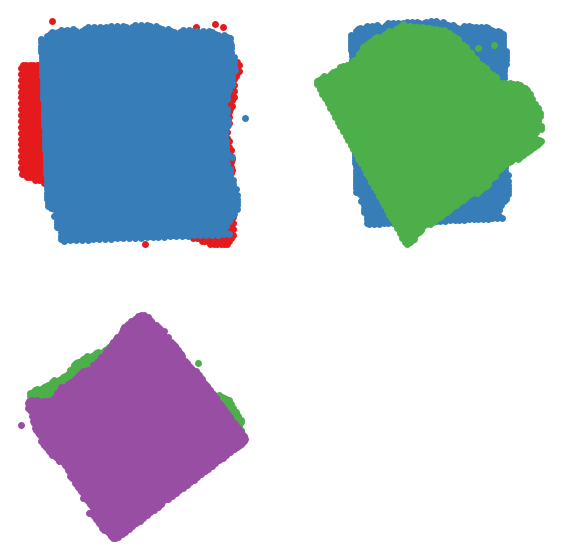

In [9]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
pst.plot_slice(new_slices[0], slice_colors[0], ax=axs[0,0])
pst.plot_slice(new_slices[1], slice_colors[1], ax=axs[0,0])
pst.plot_slice(new_slices[1], slice_colors[1], ax=axs[0,1])
pst.plot_slice(new_slices[2], slice_colors[2], ax=axs[0,1])
pst.plot_slice(new_slices[2], slice_colors[2], ax=axs[1,0])
pst.plot_slice(new_slices[3], slice_colors[3], ax=axs[1,0])
fig.delaxes(axs[1,1])
plt.show()

In [11]:
# save coor
new_coord=np.vstack((new_slices[0].obsm['spatial'],
                    new_slices[1].obsm['spatial'],
                    new_slices[2].obsm['spatial'],
                    new_slices[3].obsm['spatial']))
cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names,new_slices[2].obs_names,new_slices[3].obs_names))
new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(output_dir + "paste_coord_"+experiment_name+".csv")

# Center align slices

In [13]:
# Center align slices
## We have to reload the slices as pairwise_alignment modifies the slices.
slices = load_slices(data_dir)
slice1, slice2, slice3, slice4 = slices

# Construct a center slice
## choose one of the slices as the coordinate reference for the center slice,
## i.e. the center slice will have the same number of spots as this slice and
## the same coordinates.

slices = [slice1, slice2, slice3, slice4]
initial_slice = slice1.copy()
lmbda = len(slices)*[1/len(slices)]

# pst.filter_for_common_genes(slices)

# b = []
# for i in range(len(slices)):
#     b.append(pst.match_spots_using_spatial_heuristic(slices[0].X, slices[i].X))

HCC-5A


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5B


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5C


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


HCC-5D


D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\anaconda\envs\PASTE\lib\site-packages\anndata\_core\anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
start = time.time()
## Possible to pass in an initial pi (as keyword argument pis_init) 
## to improve performance, see Tutorial.ipynb notebook for more details.
# center_slice, pis = pst.center_align(initial_slice, slices, lmbda) 

center_slice, pis = pst.center_align(initial_slice, slices, lmbda, random_seed = 5, backend = ot.backend.TorchBackend(), use_gpu = True)
# center_slice, pis = pst.center_align(initial_slice, slices, lmbda, pis_init = b, backend = ot.backend.TorchBackend(), use_gpu = True) 

print('Runtime: ' + str(time.time() - start))

gpu is available, using gpu.
Filtered all slices for common genes. There are 14051 common genes.
Iteration: 0
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  -7448106.8125
Difference: 7448106.8125

Iteration: 1
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.3851978481
Difference: 8216379.197697848

Iteration: 2
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768271.8226978481
Difference: 0.5625

Iteration: 3
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.1351978332
Difference: 0.3124999850988388

Iteration: 4
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.3851978481
Difference: 0.2500000149011612

Iteration: 5
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768271.8226978481
Difference: 0.5625

Iteration: 6
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.1351978332
Difference: 0.3124999850988388

Iteration: 7
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.3851978481
Difference: 0.2500000149011612

Iteration: 8
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768271.8226978481
Difference: 0.5625

Iteration: 9
Solving Pairwise Slice Alignment Problem.


D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
D:\anaconda\envs\PASTE\lib\site-packages\ot\lp\__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


Solving Center Mapping NMF Problem.
Objective  768272.1351978332
Difference: 0.3124999850988388

Runtime: 1771.9084618091583


In [15]:
## The low dimensional representation of our center slice is held 
## in the matrices W and H, which can be used for downstream analyses
W = center_slice.uns['paste_W']
H = center_slice.uns['paste_H']

In [16]:
print(type(W))
print(type(H))
print(W)
print(H)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0.00770189 0.36051336 0.13748097 ... 0.32403407 0.11416058 0.10790239]
 [0.32824755 0.17619415 0.15844987 ... 0.17117733 0.32977244 0.6772984 ]
 [0.07784192 0.21951889 0.1380205  ... 0.46063882 0.5519986  0.05022889]
 ...
 [0.50172406 0.17759536 0.15299587 ... 0.2006084  0.30965143 0.18697622]
 [0.5845128  0.15221812 0.06844448 ... 0.3347965  0.05034554 0.33301258]
 [0.3415941  0.15614797 0.05850553 ... 0.16595979 0.16203627 0.05349541]]
[[9.11750551e-03 8.03013612e-03 9.55979573e-04 ... 4.18573655e-02
  2.11156021e-06 2.00400245e-03]
 [7.20971322e-04 6.80757128e-03 3.30223666e-05 ... 1.21113144e-01
  2.48050578e-02 2.40304600e-02]
 [1.74209382e-02 7.38320407e-03 1.96621213e-02 ... 7.90480748e-02
  1.62312872e-07 5.72407693e-02]
 ...
 [1.07515277e-02 2.92265578e-03 6.97158757e-05 ... 8.82465392e-02
  3.20165628e-03 4.32450101e-02]
 [7.07609695e-04 1.70891697e-03 1.50403182e-04 ... 5.23868240e-02
  1.20772411e-05 4.53851633e-02]
 [1.6061

In [17]:
print(W.shape)
print(H.shape)

(3457, 15)
(15, 14051)


In [18]:
np.savetxt(output_dir + experiment_name +"_W.csv", W, delimiter=",")
np.savetxt(output_dir + experiment_name +"_H.csv", H, delimiter=",")

In [19]:
center, new_slices = pst.stack_slices_center(center_slice, slices, pis)

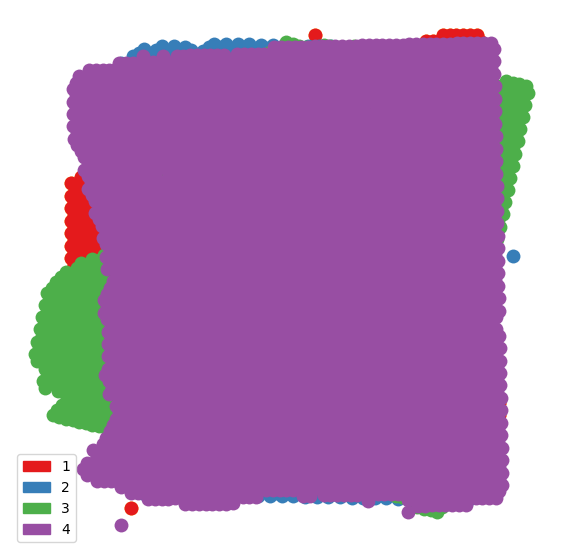

In [20]:
center_color = 'orange'
slices_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

plt.figure(figsize=(7,7))
pst.plot_slice(center,center_color,s=400)
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slices_colors[i],s=400)

plt.legend(handles=[mpatches.Patch(color=slices_colors[0], label='1'),mpatches.Patch(color=slices_colors[1], label='2'),mpatches.Patch(color=slices_colors[2], label='3'),mpatches.Patch(color=slices_colors[3], label='4')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

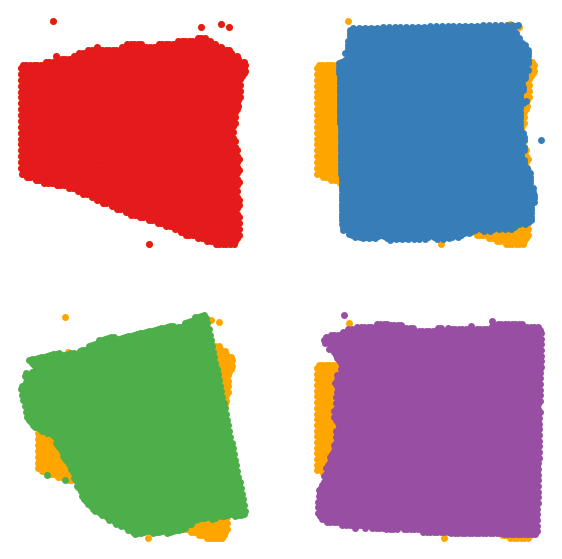

In [21]:
center_color = 'orange'
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(2, 2,figsize=(7,7))
pst.plot_slice(center,center_color,ax=axs[0,0])
pst.plot_slice(new_slices[0],slice_colors[0],ax=axs[0,0])

pst.plot_slice(center,center_color,ax=axs[0,1])
pst.plot_slice(new_slices[1],slice_colors[1],ax=axs[0,1])

pst.plot_slice(center,center_color,ax=axs[1,0])
pst.plot_slice(new_slices[2],slice_colors[2],ax=axs[1,0])

pst.plot_slice(center,center_color,ax=axs[1,1])
pst.plot_slice(new_slices[3],slice_colors[3],ax=axs[1,1])
plt.show()